#Regression & Its Evaluation | Assignment

1. What is Simple Linear Regression?
   - Simple Linear Regression is a statistical method used to model the relationship between two continuous variables: one independent variable (predictor) and one dependent variable (response).

2. What are the key assumptions of Simple Linear Regression?
   - The key assumptions of Simple Linear Regression are:
     - Linearity: The relationship between the independent and dependent variables is linear.
     - Independence: The observations are independent of each other.
     - Homoscedasticity: The variance of the errors is constant across all levels of the independent variable.
     - Normality: The errors are normally distributed.
     - No multicollinearity: If there are multiple independent variables (in the case of multiple linear regression), they should not be highly correlated with each other.

3. What is heteroscedasticity, and why is it important to address in regression
models?
   - Heteroscedasticity is a condition in regression analysis wherethe spread of the residuals around the regression line changes as the value of the independent variable changes.
   IMPORTANCE:
   - Inefficient estimates: While the regression coefficients may still be unbiased, their standard errors will be incorrect.
   - Incorrect hypothesis tests: The incorrect standard errors will affect the t-tests and F-tests used for hypothesis testing.
   - Invalid confidence intervals: Confidence intervals for the regression coefficients will also be incorrect, making it difficult to determine the true range of possible values for the coefficients.

4. What is Multiple Linear Regression?
   - Multiple Linear Regression is an extension of simple linear regression. While simple linear regression models the relationship between a dependent variable and one independent variable, multiple linear regression models the relationship between a dependent variable and two or more independent variables.

5. What is polynomial regression, and how does it differ from linear
regression?
   - Polynomial regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.
   Here's how it differs from linear regression:
   - Relationship: Linear regression models a straight-line relationship, while polynomial regression models a curved relationship using polynomial term.
   - Equation: In simple linear regression, the equation is typically. In polynomial regression, the equation includes higher-order terms.
   - Flexibility: Polynomial regression offers more flexibility in capturing non-linear patterns in the data compared to linear regression.

6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

     ● X = [1, 2, 3, 4, 5]

     ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()

model.fit(X, Y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

Intercept: 0.17999999999999794
Coefficient: 1.9800000000000004


7. Fit a Multiple Linear Regression model on this sample data:

   ● Area = [1200, 1500, 1800, 2000]

   ● Rooms = [2, 3, 3, 4]

   ● Price = [250000, 300000, 320000, 370000]

     Check for multicollinearity using VIF and report the results.


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

data = pd.DataFrame({'Area': Area, 'Rooms': Rooms, 'Price': Price})

X = data[['Area', 'Rooms']]
y = data['Price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

X_with_constant = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i)
                   for i in range(X_with_constant.shape[1])]

print("\nMulticollinearity Check (VIF):")
print(vif_data)

Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Multicollinearity Check (VIF):
  Variable        VIF
0    const  34.210526
1     Area   7.736842
2    Rooms   7.736842


8. Implement polynomial regression on the following data:

     ● X = [1, 2, 3, 4, 5]

     ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

     Fit a 2nd-degree polynomial and plot the resulting curve.


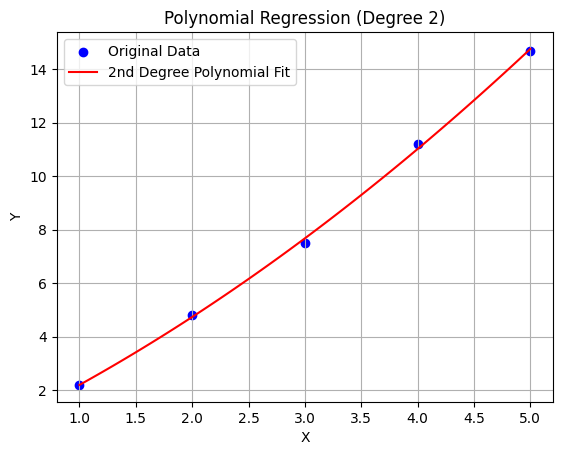

Polynomial Regression Coefficients: [0.   1.94 0.2 ]
Polynomial Regression Intercept: 0.06000000000000938


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
Y_plot = model.predict(X_plot_poly)

plt.scatter(X, Y, color='blue', label='Original Data')
plt.plot(X_plot, Y_plot, color='red', label='2nd Degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

print("Polynomial Regression Coefficients:", model.coef_)
print("Polynomial Regression Intercept:", model.intercept_)

9. Create a residuals plot for a regression model trained on this data:

     ● X = [10, 20, 30, 40, 50]

     ● Y = [15, 35, 40, 50, 65]

     Assess heteroscedasticity by examining the spread of residuals.


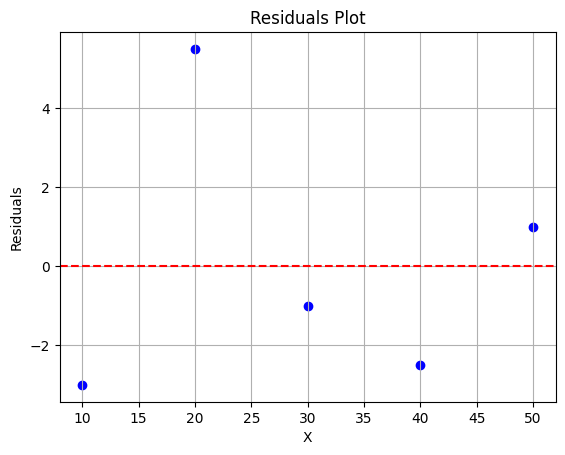

Model Intercept: 6.499999999999993
Model Coefficient: 1.1500000000000001


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

residuals = Y - Y_pred

plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


print("Model Intercept:", model.intercept_)
print("Model Coefficient:", model.coef_[0])

10. Imagine you are a data scientist working for a real estate company. You
     need to predict house prices using features like area, number of rooms, and location.

     However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
     
     - Here are the steps I would take as a data scientist:
      
       - Addressing Heteroscedasticity:
         - I would first try to understand why heteroscedasticity is present.
         - A common approach is to apply a transformation to the dependent variable (house price).
         - If the pattern of heteroscedasticity is known or can be estimated, Weighted Least Squares regression can be used.
         - Even if heteroscedasticity is present, the regression coefficients remain unbiased.
         - Sometimes, heteroscedasticity can be a sign that the model is misspecified.

        - Addressing Multicollinearity:
          - I would use techniques like calculating Variance Inflation Factors (VIF) or examining the correlation matrix to identify which independent variables are highly correlated.
          - If two or more variables are highly correlated, removing one of them is a straightforward solution.
          - Instead of removing variables, I might create a new composite variable that combines the information from the highly correlated variables.
          - Techniques like Principal Component Analysis (PCA) can be used to create a new set of uncorrelated variables from the original correlated variables.
          - Regularization techniques like Ridge and Lasso regression can help mitigate the impact of multicollinearity by adding a penalty term to the loss function that shrinks the regression coefficients.

        - Ensuring a Robust Model:

          After addressing these issues, I would:
          - Fit the model again with the chosen remedies and re-examine the residuals plot and VIF values to confirm that the issues have been mitigated.
          - Verify if the other assumptions of linear regression are met.
          - Use appropriate evaluation metrics on a separate test set to assess the model's predictive performance and generalization ability.
          - Carefully interpret the coefficients of the final model, keeping in mind any transformations or variable combinations that were applied.
          - Clearly communicate the steps taken to address heteroscedasticity and multicollinearity, as well as the final model's performance and limitations, to stakeholders.